In [137]:
%matplotlib inline
import pandas  as pd
import numpy as np
import os

In [5]:
!echo $PWD/.

/cellar/users/btsui/Project/METAMAP/notebook/RapMapTest/AnalyzeReferences/.


In [6]:
MHB_df=pd.read_excel('ng.3805-S2.xlsx',sheetname='S. Table 1')

In [12]:
mhbLengthS=(MHB_df.start-MHB_df.end).abs()

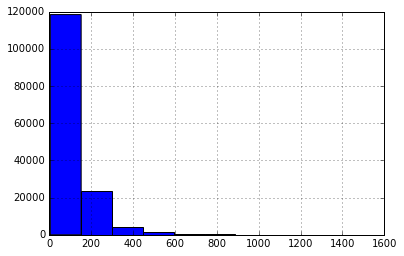

In [14]:
mhbLengthS.hist()

In [ ]:
#extend 100 bases to the left and right. 

In [28]:
humanRefTransriptomeS=pd.Series.from_csv(
    '/cellar/users/btsui/Data/SAILFISH_TRANSCRIPTOME_INDEX/hgGRC38/Homo_sapiens.GRCh38.cdna.all.fa'
,index_col=None)

In [145]:
pd.read_csv("~/Data/SRA/realigned_DATA_V9/hgGRC38/SRR4450429.quant.sf",sep='\t').shape

(170893, 5)

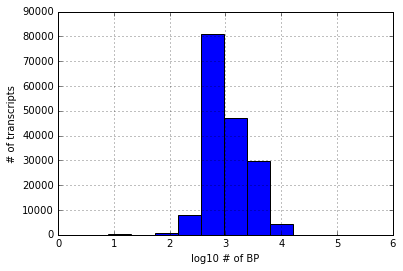

In [141]:
ax=np.log10(pd.read_csv("~/Data/SRA/realigned_DATA_V9/hgGRC38/SRR4450429.quant.sf",sep='\t').Length).hist()
ax.set_ylabel('# of transcripts')
ax.set_xlabel('log10 # of BP')

In [38]:
#humanRefTransriptomeS

In [39]:
#humanRefSeq.str.len().hist()

In [40]:
!mkdir /cellar/users/btsui/Data/RAPMAP_TRANSCRIPTOME_INDEX

In [46]:
!ls /cellar/users/btsui/Data/SAILFISH_TRANSCRIPTOME_INDEX/hgGRC38/

hash.bin     Homo_sapiens.GRCh38.cdna.all.fa  rsd.bin  txpInfo.bin
header.json  logs			      sa.bin   versionInfo.json


In [52]:
rapmapDir='/cellar/users/btsui/Program/rapmap/RapMap-master/bin/rapmap quasiindex -t Homo_sapiens.GRCh38.cdna.all.fa -i ref_index'
rapmapDir

'/cellar/users/btsui/Program/rapmap/RapMap-master/bin/rapmap'

In [47]:
!mkdir /cellar/users/btsui/Data/RAPMAP_INDEX/TRANSCRIPTOME/Homo_sapiens

In [49]:
#get the samples from encode
#!cp /cellar/users/btsui/Data/SAILFISH_TRANSCRIPTOME_INDEX/hgGRC38/Homo_sapiens.GRCh38.cdna.all.fa /cellar/users/btsui/Data/RAPMAP_INDEX/TRANSCRIPTOME/Homo_sapiens/.

In [ ]:
#rapmap quasimap -i ref_index -1 <(gunzip -c r1.fq.gz) -2 <(gunzip -c r2.fq.gz) -t 8 -o mapped_reads.sam

In [113]:
myoption=r'"/cellar/users/btsui/.aspera/connect/bin/ascp|/cellar/users/btsui/.aspera/connect/etc/asperaweb_id_dsa.openssh"'
my_id='SRR521458'
downloadCommand=['prefetch','-t','ascp','--ascp-path',myoption,my_id]

In [114]:
os.system(' '.join(downloadCommand))

0

In [115]:
SRA_FASTQ_TOOL_DIR="/cellar/users/btsui/Program/SRA_TOOL_KIT/sratoolkit.2.4.2-ubuntu64/bin/fastq-dump.2.4.2"
job_tmp_dir='/cellar/users/btsui/Project/METAMAP/notebook/RapMapTest/AnalyzeReferences/'
dump_command=[SRA_FASTQ_TOOL_DIR,"-B","--split-files",'/tmp/btsui/METH/sra/SRR521458.sra', '-M', '0',"-O",job_tmp_dir]
#os.mkdir(job_tmp_dir+my_id)
os.system(' '.join(dump_command))

0

In [94]:
' '.join(dump_command)

'/cellar/users/btsui/Program/SRA_TOOL_KIT/sratoolkit.2.4.2-ubuntu64/bin/fastq-dump.2.4.2 -B --split-files /cellar/users/btsui/Project/METAMAP/notebook/RapMapTest/AnalyzeReferences/SRR521457 -M 0 -O /cellar/users/btsui/Project/METAMAP/notebook/RapMapTest/AnalyzeReferences/'

In [89]:
!/cellar/users/btsui/Program/SRA_TOOL_KIT/sratoolkit.2.4.2-ubuntu64/bin/fastq-dump.2.4.2 -B --split-files ./SRR521457 -M 0 -O ./

2017-11-16T08:38:14 fastq-dump.2.4.2 err: item not found while constructing within virtual database module - the path './SRR521457' cannot be opened as database or table


In [128]:
myRef='/cellar/users/btsui/Data/RAPMAP_INDEX/TRANSCRIPTOME/Homo_sapiens/ref_index/'
myCmd='/cellar/users/btsui/Program/rapmap/RapMap-master/bin/rapmap quasimap -i {ref} -1 {r1} -2 {r2} -o mapped_reads.sam'.format(ref=myRef,r1='SRR521458_1.fastq'
                                                 ,r2='SRR521458_2.fastq')

In [129]:
myCmd

'/cellar/users/btsui/Program/rapmap/RapMap-master/bin/rapmap quasimap -i /cellar/users/btsui/Data/RAPMAP_INDEX/TRANSCRIPTOME/Homo_sapiens/ref_index/ -1 SRR521458_1.fastq -2 SRR521458_2.fastq -o mapped_reads.sam'

In [136]:
!ls 

mapped_reads.sam  SRR019649_1.fastq  SRR521458_2.fastq
ng.3805-S2.xlsx   SRR521457	     testQuasiMap.ipynb
SRR019649	  SRR521458_1.fastq  Untitled1.ipynb


In [133]:
!tail mapped_reads.sam


SRR521458.480000	83	ENST00000352035	172	1	76M	=	56	-192	TCCTTTACAAGTTCATCTGTACCACCTCAGCCATCCAGAATCGGTTCAAGTATGCTCGGGTCACTCCTGACACAGA	*	NH:i:5
SRR521458.480000	163	ENST00000352035	56	1	75M	=	172	192	CGCGGGGTTCGTCGGGCCTGTGGAAGAAGCGCCGCGCACGGACTTCCGCAGGGGGCAGGGCGGTCTGGCCTCGCC	*	NH:i:5
SRR521458.480000	339	ENST00000590151	151	1	76M	=	31	-196	TCCTTTACAAGTTCATCTGTACCACCTCAGCCATCCAGAATCGGTTCAAGTATGCTCGGGTCACTCCTGACACAGA	*	NH:i:5
SRR521458.480000	419	ENST00000590151	31	1	75M	=	151	196	CGCGGGGTTCGTCGGGCCTGTGGAAGAAGCGCCGCGCACGGACTTCCGCAGGGGGCAGGGCGGTCTGGCCTCGCC	*	NH:i:5
SRR521458.480000	339	ENST00000537919	168	1	76M	=	52	-192	TCCTTTACAAGTTCATCTGTACCACCTCAGCCATCCAGAATCGGTTCAAGTATGCTCGGGTCACTCCTGACACAGA	*	NH:i:5
SRR521458.480000	419	ENST00000537919	52	1	75M	=	168	192	CGCGGGGTTCGTCGGGCCTGTGGAAGAAGCGCCGCGCACGGACTTCCGCAGGGGGCAGGGCGGTCTGGCCTCGCC	*	NH:i:5
SRR521458.480000	339	ENST00000393896	211	1	76M	=	91	-196	TCCTTTACAAGTTCATCTGTACCACCTCAGCCATCCAGAATCGGTTCAAGTATGCTCGGGTCACTCCTGACACAGA	*	NH:i:5
SRR521

In [ ]:
#